In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


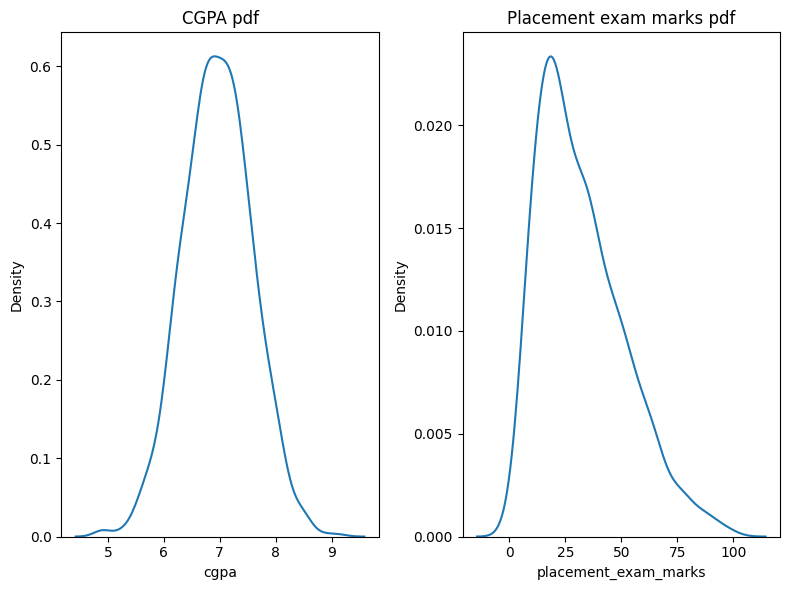

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(8,6))
sns.kdeplot(df['cgpa'], ax=axs[0])
axs[0].set_title('CGPA pdf')

sns.kdeplot(df['placement_exam_marks'], ax=axs[1])
axs[1].set_title('Placement exam marks pdf')
plt.tight_layout()
plt.show()

In [5]:
df.skew()

cgpa                   -0.014530
placement_exam_marks    0.835642
placed                  0.044077
dtype: float64

### The IQR-Based Filtering  method can only be applied to the placement exam marks column as it shows a skewed distribution, and IQR-Based filtering works best on skewed data.

In [13]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

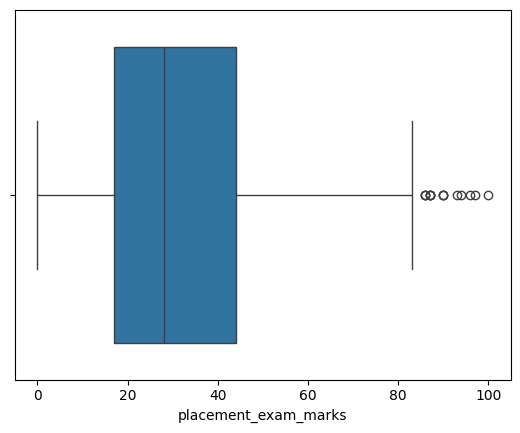

In [19]:
sns.boxplot(x=df['placement_exam_marks'])
plt.show()

In [35]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

iqr = percentile75 - percentile25

print(f"25th percentile: {percentile25}")
print(f"75th percentile: {percentile75}")
print(f"Inter Quartile Range: {iqr}")

25th percentile: 17.0
75th percentile: 44.0
Inter Quartile Range: 27.0


In [39]:
highest = percentile75 + (1.5*iqr)
lowest = percentile25 - (1.5*iqr)
outliers = df[(df['placement_exam_marks'] < lowest) | (df['placement_exam_marks'] > highest)]

In [47]:
print(f"Upper Limit: {highest}")
print(f"Lower Limit: {lowest}")

Upper Limit: 84.5
Lower Limit: -23.5


In [45]:
outliers

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


## Trimming

In [50]:
df_without_outliers = df[(df['placement_exam_marks'] > lowest) & (df['placement_exam_marks'] < highest)]

In [52]:
df_without_outliers

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


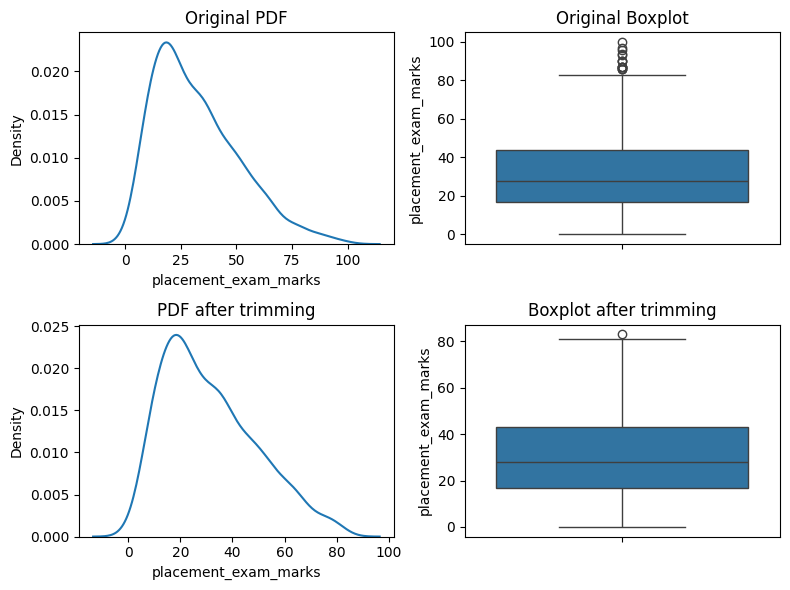

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(8,6))

sns.kdeplot(df['placement_exam_marks'], ax=axs[0,0])
axs[0,0].set_title("Original PDF")
sns.boxplot(df['placement_exam_marks'], ax=axs[0,1])
axs[0,1].set_title("Original Boxplot")

sns.kdeplot(df_without_outliers['placement_exam_marks'], ax=axs[1,0])
axs[1,0].set_title("PDF after trimming")
sns.boxplot(df_without_outliers['placement_exam_marks'], ax=axs[1,1])
axs[1,1].set_title("Boxplot after trimming")

plt.tight_layout()
plt.show()

In [70]:
df_without_outliers.describe()

,cgpa,placement_exam_marks,placed
count,985.000000,985.000000,985.00000
mean,6.961594,31.339086,0.48934
std,0.614734,17.857633,0.50014
min,4.890000,0.000000,0.00000
25%,6.550000,17.000000,0.00000
50%,6.960000,28.000000,0.00000
75%,7.370000,43.000000,1.00000
max,9.120000,83.000000,1.00000


## Capping

In [75]:
df_cap = df.copy()

In [81]:
df_cap['placement_exam_marks'] = np.where(df_cap['placement_exam_marks'] < lowest,
                                         lowest,
                                         np.where(df_cap['placement_exam_marks'] > highest, 
                                                  highest,
                                                  df_cap['placement_exam_marks']
                                                 ))

In [83]:
df_cap.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000


In [85]:
df_cap.shape

(1000, 3)

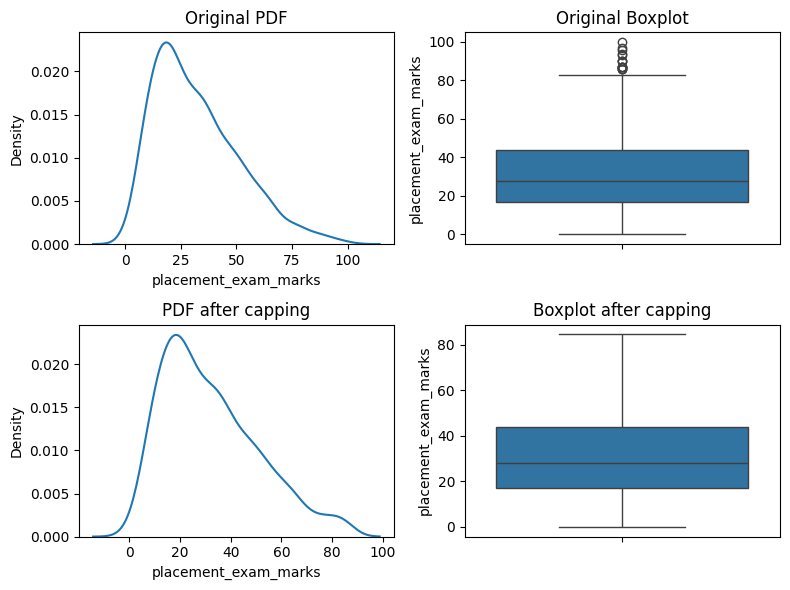

In [87]:
fig, axs = plt.subplots(2, 2, figsize=(8,6))

sns.kdeplot(df['placement_exam_marks'], ax=axs[0,0])
axs[0,0].set_title("Original PDF")
sns.boxplot(df['placement_exam_marks'], ax=axs[0,1])
axs[0,1].set_title("Original Boxplot")

sns.kdeplot(df_cap['placement_exam_marks'], ax=axs[1,0])
axs[1,0].set_title("PDF after capping")
sns.boxplot(df_cap['placement_exam_marks'], ax=axs[1,1])
axs[1,1].set_title("Boxplot after capping")

plt.tight_layout()
plt.show()